##Installation


In [1]:
!pip install keras
!pip install tensorflow
!pip install split-folders
#!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Import Libraries


In [2]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.utils 
import numpy as np
from PIL import Image
import os


import matplotlib.pyplot as plt
import pandas as pd
import keras
import cv2
import os
import math
import splitfolders
import itertools

from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array


from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
#from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array,load_img
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.utils import img_to_array
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
#import gradio
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression




##Upload/Connect Dataset


In [3]:
from google.colab import drive
drive.mount('/content/drive')
input_dataset=('/content/drive/MyDrive/3 kinds of Pneumonia(dataset)(new)')

Mounted at /content/drive


#Dataset Analysis

In [4]:
number_of_images = {}

for dir in os.listdir(input_dataset):
  number_of_images[dir] = len(os.listdir(os.path.join(input_dataset,dir)))

number_of_images.items()


dict_items([('Pneumonia-Viral', 3114), ('Normal', 3270), ('Pneumonia-Bacterial', 3001), ('COVID-19', 3395)])

##Dataset Bar Chart

##Splitting Dataset into Train, Validation and test

In [5]:
from splitfolders.split import group_by_prefix
splitfolders.ratio(input_dataset,output="dataset",seed=1337, ratio=(.7, .2, .1), group_prefix=None, move=False)

Copying files: 12780 files [06:46, 31.46 files/s] 


#CNN Model Implementation

##Data Preprocessing for CNN

In [6]:

def preprocessing_train(path):
  image_data=ImageDataGenerator(rescale=1/225,zoom_range=0.2,shear_range=0.2,horizontal_flip=True,vertical_flip=False)
  image=image_data.flow_from_directory(directory=path, shuffle=True,target_size=(224,224),batch_size=32,class_mode="categorical")

  return image



In [7]:
path_tr='/content/dataset/train'
train_data=preprocessing_train(path_tr)#pre-processing training dataset

Found 8944 images belonging to 4 classes.


In [8]:
def preprocessing_v(path):
  image_data=ImageDataGenerator(rescale=1/225)
  image=image_data.flow_from_directory(directory=path, shuffle=True,target_size=(224,224),batch_size=32,class_mode="categorical")


  
  return image

In [9]:
path_v='/content/dataset/val'
val_data=preprocessing_v(path_v)#pre-processing validation dataset

Found 2555 images belonging to 4 classes.


In [10]:
path_test='/content/dataset/test'
test_data=preprocessing_v(path_test)#pre-processing validation dataset

Found 1281 images belonging to 4 classes.


In [11]:
x_test, y_test = [], []
for i in range(len(test_data)):
    batch_x, batch_y = test_data[i]
    x_test.append(batch_x)
    y_test.append(batch_y)

# Concatenate the batches to obtain the final x_train and y_train arrays
x_test = tf.concat(x_test, axis=0)
y_test = tf.concat(y_test, axis=0)

# Print the shape of the x_train and y_train arrays
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_test shape: (1281, 224, 224, 3)
y_test shape: (1281, 4)


#CNN Model

In [12]:
model = Sequential()
#conv_layer1
model.add(Conv2D(64 , (3,3), padding = 'same' , activation = 'relu' , input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , padding = 'same'))

#conv_layer2
model.add(Conv2D(64 , (3,3) , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , padding = 'same'))


#conv_layer3
model.add(Conv2D(128 , (3,3) , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , padding = 'same'))

#conv_layer4
model.add(Conv2D(128 , (3,3) , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)  , padding = 'same'))



#conv_layer5
model.add(Conv2D(256 , (3,3) , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)  , padding = 'same'))

#conv_layer6
model.add(Conv2D(256 , (3,3) , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)  , padding = 'same'))

#conv_layer7
model.add(Conv2D(256 , (3,3) , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)  , padding = 'same'))

#conv_layer8
# model.add(Conv2D(256 , (3,3)  , padding = 'same' , activation = 'relu'))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2,2) , padding = 'same'))


#conv_layer9
model.add(Conv2D(512 , (3,3)  , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , padding = 'same'))


#conv_layer10
model.add(Conv2D(512 , (3,3)  , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , padding = 'same'))


#conv_layer11
model.add(Conv2D(512 , (3,3)  , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , padding = 'same'))


#conv_layer12
model.add(Conv2D(512 , (3,3)  , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , padding = 'same'))





#Flatten Layer
model.add(Flatten())
#output layer
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dense(units = 256 , activation = 'relu'))
model.add(Dense(units = 4 , activation = 'softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 batch_normalization_1 (Batc  (None, 112, 112, 64)     256       
 hNormalization)                                                 
                                                        

In [13]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
#Early Stopping
es=EarlyStopping(monitor="val_accuracy", patience=20, verbose=1, mode="max")

#Model check point
mc= ModelCheckpoint(monitor="val_accuracy", filepath="./Best_model.h5", verbose=1, save_best_only=True, mode="max")
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, min_lr=0.000000001)

cb=[es,mc,reduce_lr]

In [ ]:
m=model.fit(train_data,steps_per_epoch=len(train_data),epochs=100,verbose=1,validation_data=(val_data),validation_steps=len(val_data),callbacks=cb)

Epoch 1/100
280/280 [==============================] - ETA: 0s - loss: 0.6935 - accuracy: 0.7209
Epoch 1: val_accuracy improved from -inf to 0.35930, saving model to ./Best_model.h5
280/280 [==============================] - 405s 1s/step - loss: 0.6935 - accuracy: 0.7209 - val_loss: 1.7972 - val_accuracy: 0.3593 - lr: 0.0010
Epoch 2/100
280/280 [==============================] - ETA: 0s - loss: 0.5228 - accuracy: 0.7917
Epoch 2: val_accuracy improved from 0.35930 to 0.65362, saving model to ./Best_model.h5
280/280 [==============================] - 369s 1s/step - loss: 0.5228 - accuracy: 0.7917 - val_loss: 0.9775 - val_accuracy: 0.6536 - lr: 0.0010
Epoch 3/100
280/280 [==============================] - ETA: 0s - loss: 0.4622 - accuracy: 0.8131
Epoch 3: val_accuracy improved from 0.65362 to 0.79687, saving model to ./Best_model.h5
280/280 [==============================] - 359s 1s/step - loss: 0.4622 - accuracy: 0.8131 - val_loss: 0.4401 - val_accuracy: 0.7969 - lr: 0.0010
Epoch 4/100
2

In [ ]:
m=model.fit(x_train,y_train,steps_per_epoch=len(train_data),epochs=100,verbose=1,validation_data=(x_val,y_val),validation_steps=len(val_data),callbacks=cb)

Epoch 1/100
175/175 [==============================] - ETA: 0s - loss: 0.7582 - accuracy: 0.6875
Epoch 1: val_accuracy improved from -inf to 0.41875, saving model to ./Best_model.h5
175/175 [==============================] - 44s 128ms/step - loss: 0.7582 - accuracy: 0.6875 - val_loss: 1.8827 - val_accuracy: 0.4187 - lr: 0.0010
Epoch 2/100
175/175 [==============================] - ETA: 0s - loss: 0.5721 - accuracy: 0.7655
Epoch 2: val_accuracy improved from 0.41875 to 0.44750, saving model to ./Best_model.h5
175/175 [==============================] - 21s 122ms/step - loss: 0.5721 - accuracy: 0.7655 - val_loss: 1.8733 - val_accuracy: 0.4475 - lr: 0.0010
Epoch 3/100
175/175 [==============================] - ETA: 0s - loss: 0.4967 - accuracy: 0.8037
Epoch 3: val_accuracy improved from 0.44750 to 0.53500, saving model to ./Best_model.h5
175/175 [==============================] - 20s 116ms/step - loss: 0.4967 - accuracy: 0.8037 - val_loss: 1.1875 - val_accuracy: 0.5350 - lr: 0.0010
Epoch 4

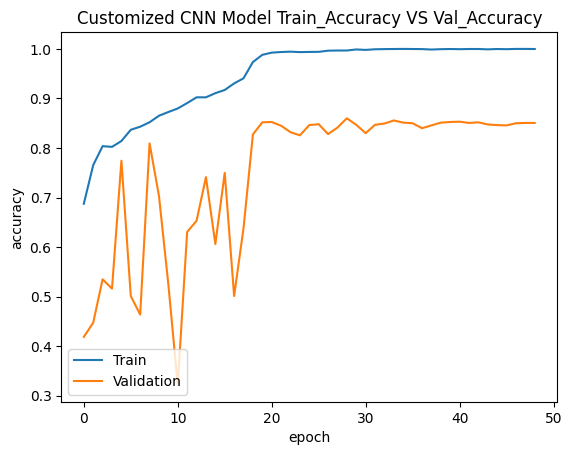

In [ ]:
plt.plot(m.history['accuracy'])
plt.plot(m.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='lower left')

plt.title("Customized CNN Model Train_Accuracy VS Val_Accuracy")
plt.show()

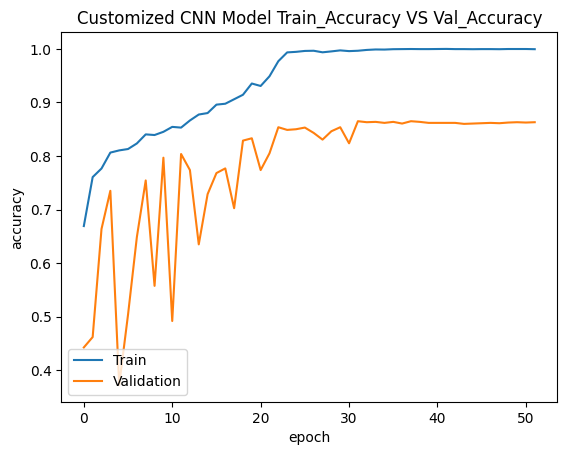

In [ ]:
plt.plot(m.history['accuracy'])
plt.plot(m.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='lower left')

plt.title("Customized CNN Model Train_Accuracy VS Val_Accuracy")
plt.show()

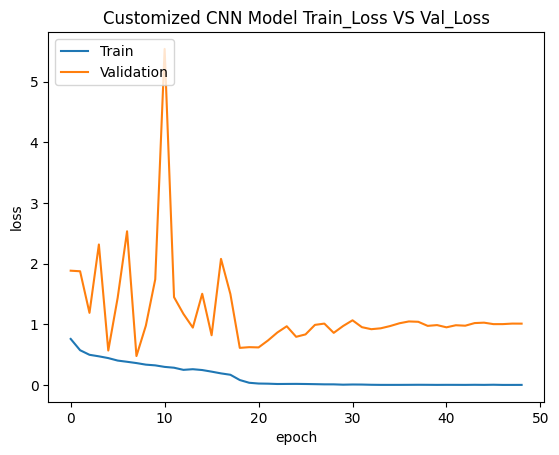

In [ ]:
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.title("Customized CNN Model Train_Loss VS Val_Loss")
plt.show()

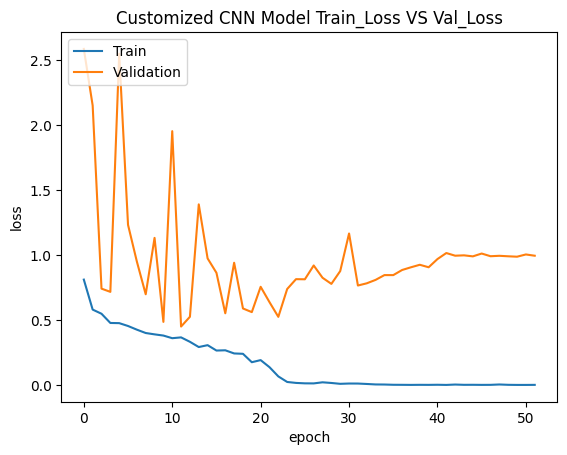

In [ ]:
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.title("Customized CNN Model Train_Loss VS Val_Loss")
plt.show()

In [ ]:
model1=load_model('/content/Best_model.h5')

In [ ]:
loss,acc=model1.evaluate(x_test,y_test)
print(f"The accuracy of Customized CNN  model is {acc*100} % and loss {loss}")

25/25 [==============================] - 1s 39ms/step - loss: 0.8410 - accuracy: 0.8587
The accuracy of Customized CNN  model is 85.87499856948853 % and loss 0.8410442471504211


In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculating the confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)


25/25 [==============================] - 1s 33ms/step


In [ ]:
report = classification_report(y_true_classes, y_pred_classes)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       200
           1       0.94      0.97      0.96       200
           2       0.79      0.73      0.76       200
           3       0.75      0.77      0.76       200

    accuracy                           0.87       800
   macro avg       0.86      0.87      0.87       800
weighted avg       0.86      0.87      0.87       800



Normalized confusion matrix


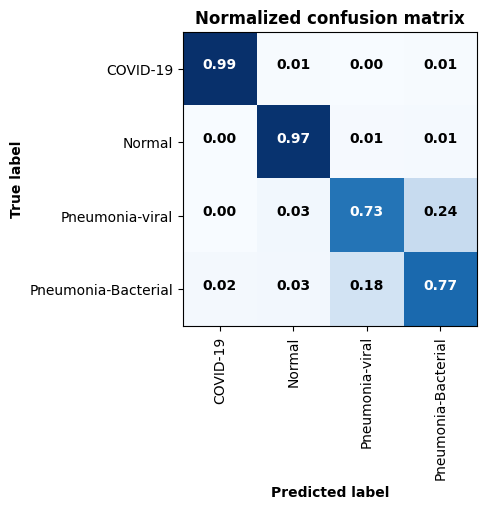

In [ ]:
import itertools
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix', cmap=plt.cm.Blues):
  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix without normalization")
  
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title,weight='bold')
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=90)
  plt.yticks(tick_marks,classes)


  fmt='.2f' if normalize else 'd'
  thresh=cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),
             horizontalalignment='center',weight='bold',
             color='white' if cm[i,j]> thresh else 'black')
  plt.tight_layout()
  plt.ylabel("True label", weight='bold')
  plt.xlabel("Predicted label",weight="bold")

#compute confusion matrix
cnf_matrix=confusion_matrix(y_true_classes, y_pred_classes)
np.set_printoptions(precision=2)

#Plot non-normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=['COVID-19','Normal','Pneumonia-viral','Pneumonia-Bacterial'],normalize=True,title="Normalized confusion matrix")
plt.show()